In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import evds as e

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from arch.unitroot import ADF, PhillipsPerron, KPSS
import pymannkendall as mk

In [2]:
data = pd.DataFrame(yf.download("XU100.IS", period="1Y", interval="1d")["Close"])
data

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2022-09-21,3245.800049
2022-09-22,3295.300049
2022-09-23,3281.600098
2022-09-26,3260.199951
2022-09-27,3265.600098
...,...
2023-09-15,7962.000000
2023-09-18,7680.399902
2023-09-19,7784.000000


In [3]:
# Now we are going to calculate the return
data["Return"] = round(data.pct_change()*100,2)
data.head()

,Close,Return
Date,,
2022-09-21,3245.800049,NaN
2022-09-22,3295.300049,1.53
2022-09-23,3281.600098,-0.42
2022-09-26,3260.199951,-0.65
2022-09-27,3265.600098,0.17


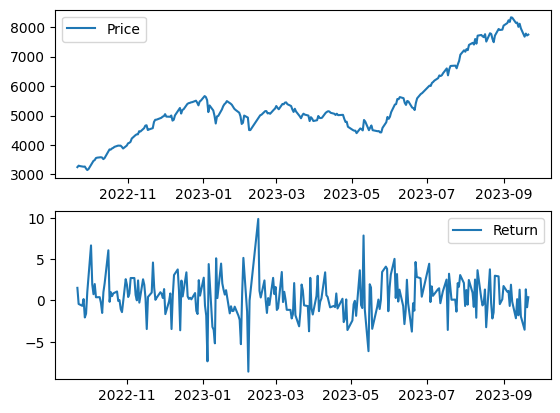

In [4]:
#Let's compare close price and return trend. We will see while price has rising trend but return has no trend in time series.
fix, ax = plt.subplots(2,1)
ax[0].plot(data["Close"], label="Price")
ax[0].legend()
ax[1].plot(data["Return"], label="Return")
ax[1].legend()
plt.show()

In [5]:
# Now we can look at the unit root tests for Close price and see in both tests that are ADF and KPSS have unit root so we can say there is trend.
adf_price = ADF(data["Close"])
kpss_price = KPSS(data["Close"])
print(adf_price)
print(kpss_price)


   Augmented Dickey-Fuller Results   
Test Statistic                 -0.807
P-value                         0.817
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  1.613
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [6]:
# Now we can look at the unit root tests for Return and see in both tests that are ADF and KPSS doesn't have unit root so we can say there is no trend.
data.dropna(inplace=True)
adf_return = ADF(data["Return"])
kpss_return= KPSS(data["Return"])
print(adf_return)
print(kpss_return)

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.713
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
    KPSS Stationarity Test Results   
Test Statistic                  0.158
P-value                         0.366
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [7]:
# Simple Interest
#Let's write a simple interest function that calculate the current value of money

def simpleInterest(capital, interes_rate, term):
    cvm = capital*(1 + interes_rate*term)
    return print(cvm)


In [8]:
#Now  calculate the end of term value of money that is 1000 dollars, 10% simple interest rate and 3 year of period.
simpleInterest(1000,0.1,3)

1300.0


In [9]:
#If we want to see how much of the money is interest
def simpleInterest(capital, interes_rate, term):
    cvm = capital*(1 + interes_rate*term)
    interest = cvm - capital
    return cvm, interest

simpleInterest(1000,0.1,3)

(1300.0, 300.0)

In [10]:
#Compound Interest
def compoundInterest(capital, interest_rate, term):
    cvm = capital*(1+interest_rate)**term
    return cvm

In [11]:
compoundInterest(1000, 0.1, 3)

1331.0000000000005

In [12]:
def compoundInterest(capital, interest_rate, term):
    cvm = capital*(1+interest_rate)**term
    interest = cvm-capital
    return cvm, interest

compoundInterest(1000, 0.1, 3)

(1331.0000000000005, 331.00000000000045)

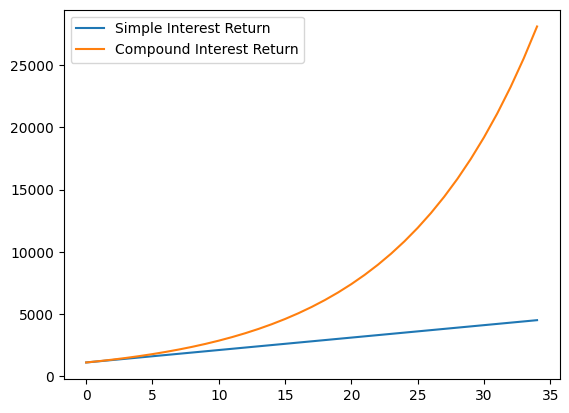

In [13]:
# Comparison graphs of simple interest and compound interest

simple_interest_return = []
compound_interest_return = []

for i in range(1,36):
    si, interest = simpleInterest(1000, 0.1, i)
    simple_interest_return.append(si)
    ci, interest = compoundInterest(1000, 0.1, i)
    compound_interest_return.append(ci)

plt.plot(simple_interest_return, label="Simple Interest Return")
plt.plot(compound_interest_return, label="Compound Interest Return")
plt.legend()
plt.show()

In [55]:
# Nominal and Real Return
# When we invest our money in something we want to know if it is profitability. To be able to assess this we need to calculate the
# nominal and real return. If our money return value is higher than the nominal we can say that it is a profitable investment.
# So in this case we can say inflation would not affect badly our investment. Additionally we always need to calculate the real return based on inflation

#Let's work with the stock market index
stock = yf.download("XU100.IS", period="2Y", interval="1mo")["Close"]
stock = pd.DataFrame(stock)
stock = stock.drop(["2023-09-01"])


[*********************100%%**********************]  1 of 1 completed


In [56]:
stock

,Close
Date,
2021-10-01,1522.000000
2021-11-01,1809.699951
2021-12-01,1857.699951
2022-01-01,2003.199951
2022-02-01,1946.199951
2022-03-01,2233.300049
2022-04-01,2430.600098
2022-05-01,2547.100098
2022-06-01,2405.399902


In [57]:
with open("/Users/neseuygun/Desktop/evds_api_key.txt") as file:
    api = file.read()

evds = e.evdsAPI(api)
cpi = evds.get_data(["TP.FG.J0"], startdate="01-10-2021", enddate="01-09-2023")
cpi

,Tarih,TP_FG_J0
0,2021-10,584.32
1,2021-11,604.84
2,2021-12,686.95
3,2022-1,763.23
4,2022-2,799.93
5,2022-3,843.64
6,2022-4,904.79
7,2022-5,931.76
8,2022-6,977.90
9,2022-7,1001.03


In [58]:
cpi = cpi.iloc[:,1].to_list()

In [59]:
stock["CPI"] = cpi
stock

,Close,CPI
Date,,
2021-10-01,1522.000000,584.32
2021-11-01,1809.699951,604.84
2021-12-01,1857.699951,686.95
2022-01-01,2003.199951,763.23
2022-02-01,1946.199951,799.93
2022-03-01,2233.300049,843.64
2022-04-01,2430.600098,904.79
2022-05-01,2547.100098,931.76
2022-06-01,2405.399902,977.90


In [60]:
stock["Close_Return"] = stock["Close"].pct_change()
stock["Inflation_Return"] = stock["CPI"].pct_change()
stock

,Close,CPI,Close_Return,Inflation_Return
Date,,,,
2021-10-01,1522.000000,584.32,NaN,NaN
2021-11-01,1809.699951,604.84,0.189028,0.035118
2021-12-01,1857.699951,686.95,0.026524,0.135755
2022-01-01,2003.199951,763.23,0.078323,0.111042
2022-02-01,1946.199951,799.93,-0.028454,0.048085
2022-03-01,2233.300049,843.64,0.147518,0.054642
2022-04-01,2430.600098,904.79,0.088345,0.072484
2022-05-01,2547.100098,931.76,0.047931,0.029808
2022-06-01,2405.399902,977.90,-0.055632,0.049519


In [61]:
# Now we can calculate the real return of close price based on inflation
stock["Real_Return"] = (1 + stock["Close_Return"]) / (1 + stock["Inflation_Return"])-1
stock

,Close,CPI,Close_Return,Inflation_Return,Real_Return
Date,,,,,
2021-10-01,1522.000000,584.32,NaN,NaN,NaN
2021-11-01,1809.699951,604.84,0.189028,0.035118,0.148688
2021-12-01,1857.699951,686.95,0.026524,0.135755,-0.096175
2022-01-01,2003.199951,763.23,0.078323,0.111042,-0.029449
2022-02-01,1946.199951,799.93,-0.028454,0.048085,-0.073028
2022-03-01,2233.300049,843.64,0.147518,0.054642,0.088064
2022-04-01,2430.600098,904.79,0.088345,0.072484,0.014789
2022-05-01,2547.100098,931.76,0.047931,0.029808,0.017598
2022-06-01,2405.399902,977.90,-0.055632,0.049519,-0.100190
